 Realizar un análisis para determinar el país que más productos consume. Puedes utilizar las
columnas "País" y "Cantidad" del conjunto de datos para determinar esto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#Agregamos las librerias necesarias para el analisis,
# usaremos Pandas para el tratamiento de los datos y matplotlib para la visualizacion

leemos el libro de excel en un dataframe 
Lo ideal seria de la siguiente manera:
    df = pd.read_excel('online_retail_II.xlsx')
pero debemos tener en cuenta que el libro tiene dos pestañas...

In [3]:
df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')



Entendemos que la informacion del año 2010 se encuentra repetida, tenemos 2 opciones
Analizar una pestaña completa y la otra solo filtrar por el año de interes

In [4]:
df1 = df1[df1['InvoiceDate'].dt.year == 2009]



Unificamos los dos dataframes, el dataframe que contiene la informacion del 2010 y 2011 junto con el dataframe filtrado en el paso anterior

In [5]:
df = pd.concat([df1, df2])


Mostramos los primeros 5 elementos para comprobar el cargue del archivo

In [6]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Agrupamos por pais y sumamos las cantidades

In [7]:
paises = df.groupby('Country')['Quantity'].sum()


Ordenamos los valores de forma ascendente

In [8]:
paises = paises.sort_values(ascending=False)


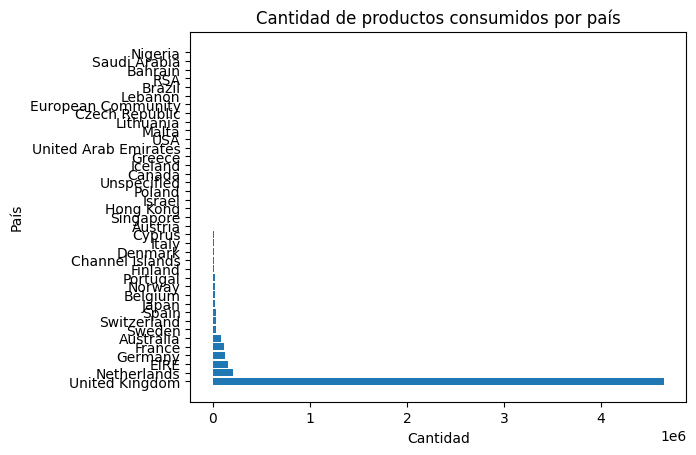

In [9]:
plt.barh(paises.index, paises.values)
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.title('Cantidad de productos consumidos por país')
plt.show()


Entendemos entonces que el pais que mas consume es United Kingdom

In [10]:
# La columna InvoiceDate la convertimos a un datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %I:%M:%S %p') 

# agrupamos los datos por cada año y ademas por país para sumar posteriormente la columna de Quantity
ventas_por_año_y_pais = df.groupby([df['InvoiceDate'].dt.year, 'Country'])['Quantity'].sum() 

# obtenemos el índice del máximo valor de ventas por año
pais_max_consumo_por_año = ventas_por_año_y_pais.groupby(level=0).idxmax() 


In [11]:
pais_max_consumo_por_año


InvoiceDate
2009    (2009, United Kingdom)
2010    (2010, United Kingdom)
2011    (2011, United Kingdom)
Name: Quantity, dtype: object

Realizar un análisis para identificar los productos más vendidos o los más populares en
términos de ganancias o cantidad de ventas.

Agrupamos por producto y luego sumamos la cantidad y ordenamos de forma descendente

In [14]:
productos_mas_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)


In [15]:
productos_mas_vendidos

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     56358
JUMBO BAG RED RETROSPOT               47363
WHITE HANGING HEART T-LIGHT HOLDER    41720
ASSORTED COLOUR BIRD ORNAMENT         41015
POPCORN HOLDER                        36334
                                      ...  
Damaged                               -7540
Printing smudges/thrown away          -9058
check                                -12030
Unsaleable, destroyed.               -15644
printing smudges/thrown away         -19200
Name: Quantity, Length: 5225, dtype: int64

In [18]:
productos_con_mas_ganancias = df.groupby('Description')['Price'].sum().sort_values(ascending=False)

In [19]:
productos_con_mas_ganancias

Description
AMAZON FEE                             249042.68
DOTCOM POSTAGE                         224826.64
Manual                                 221765.20
POSTAGE                                 47826.96
REGENCY CAKESTAND 3 TIER                30360.61
                                         ...    
add stock to allocate online orders         0.00
adjust                                      0.00
adjustment                                  0.00
wrongly sold sets                           0.00
Adjust bad debt                        -11062.06
Name: Price, Length: 5225, dtype: float64

Analizar el conjunto de datos para detectar patrones y tendencias, por ejemplo, identificar si
hay picos de ventas durante ciertos meses del año.

In [20]:
# la columna InvoiceDate la convertimos a tipo fecha
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Agrupamos aqui todos los datos por mes para luego obtener  la cantidad total de ventas
ventas_por_mes = df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m'))['Quantity'].sum()

# Imprimir el resultado
print(ventas_por_mes)

InvoiceDate
2009-12    420088
2010-12    342228
2011-01    308966
2011-02    277989
2011-03    351872
2011-04    289098
2011-05    380391
2011-06    341623
2011-07    391116
2011-08    406199
2011-09    549817
2011-10    570532
2011-11    740286
2011-12    226334
Name: Quantity, dtype: int64


Realizar un análisis de correlación para determinar la relación entre las variables, por ejemplo,
si existe una correlación entre el precio y la cantidad de ventas

In [22]:
# Validamos de que las columnas Price y Quantity contengas numeros
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# correlación entre el precio y la cantidad de ventas
correlacion = df['Price'].corr(df['Quantity'])




In [23]:
correlacion 

-0.0013188822082281888

correlación de Pearson
cercano a 1, correlacion positiva, aumenta uno entonces aumenta el segundo tambien
cercano a -1 correlacion negativa, aumenta alguno disminuye el otro  (Asociacion inversa)
cercano a cero, no hay correlacion